In [6]:
import os
import sys
import re
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad.notebook import Nb

pd.options.display.max_rows = 10

In [113]:
# Setup notebook
nbconfig = Nb.setup_notebook(seurat_dir='../scrnaseq-wf/data/scrnaseq_combine_force')
clusters = nbconfig.seurat.get_clusters('res.0.6')
raw = nbconfig.seurat.get_raw()

last updated: 2018-09-05 
Git hash: a21c2edfb45b9f4cb6c7300dc1dc014f722096dd


In [114]:
raw

cell_id,rep1_AAACCTGAGACAAGCC,rep1_AAACCTGAGCTTATCG,rep1_AAACCTGGTGTAATGA,rep1_AAACCTGGTTCATGGT,rep1_AAACCTGTCCCTCTTT,rep1_AAACGGGAGACTGGGT,rep1_AAACGGGCACAGTCGC,rep1_AAACGGGGTCGCGTGT,rep1_AAACGGGGTGTTAAGA,rep1_AAACGGGTCGTCCAGG,...,rep3_TTTGTCACAGTCACTA,rep3_TTTGTCACATTTCAGG,rep3_TTTGTCAGTACATGTC,rep3_TTTGTCAGTACCCAAT,rep3_TTTGTCAGTGGACGAT,rep3_TTTGTCATCATAAAGG,rep3_TTTGTCATCATGGTCA,rep3_TTTGTCATCCCTTGTG,rep3_TTTGTCATCTCCGGTT,rep3_TTTGTCATCTTGCAAG
FBgn,,,,,,,,,,,,,,,,,,,,,
FBgn0031081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0031085,0,0,0,2,0,0,0,0,0,0,...,0,2,0,0,1,1,1,2,0,0
FBgn0040784,0,0,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
FBgn0031086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0031082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBgn0035736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0035685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0042187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
rep = clusters.index.str.extract(r'(?P<rep>rep\d)')
rep.index = clusters.index

AttributeError: 'Series' object has no attribute 'join'

In [122]:
rep.join(clusters)

,rep,cluster
rep1_AAACCTGAGACAAGCC,rep1,1
rep1_AAACCTGAGCTTATCG,rep1,1
rep1_AAACCTGGTGTAATGA,rep1,5
rep1_AAACCTGGTTCATGGT,rep1,2
rep1_AAACCTGTCCCTCTTT,rep1,1
...,...,...
rep3_TTTGTCATCATAAAGG,rep3,1
rep3_TTTGTCATCATGGTCA,rep3,0
rep3_TTTGTCATCCCTTGTG,rep3,0
rep3_TTTGTCATCTCCGGTT,rep3,7


In [116]:
clusters

rep1_AAACCTGAGACAAGCC    1
rep1_AAACCTGAGCTTATCG    1
rep1_AAACCTGGTGTAATGA    5
rep1_AAACCTGGTTCATGGT    2
rep1_AAACCTGTCCCTCTTT    1
                        ..
rep3_TTTGTCATCATAAAGG    1
rep3_TTTGTCATCATGGTCA    0
rep3_TTTGTCATCCCTTGTG    0
rep3_TTTGTCATCTCCGGTT    7
rep3_TTTGTCATCTTGCAAG    2
Name: cluster, Length: 13810, dtype: int64

In [8]:
raw

cell_id,rep1_AAACCTGAGACAAGCC,rep1_AAACCTGAGCTTATCG,rep1_AAACCTGGTGTAATGA,rep1_AAACCTGGTTCATGGT,rep1_AAACCTGTCCCTCTTT,rep1_AAACGGGAGACTGGGT,rep1_AAACGGGCACAGTCGC,rep1_AAACGGGGTCGCGTGT,rep1_AAACGGGGTGTTAAGA,rep1_AAACGGGTCGTCCAGG,...,rep3_TTTGTCACAGTCACTA,rep3_TTTGTCACATTTCAGG,rep3_TTTGTCAGTACATGTC,rep3_TTTGTCAGTACCCAAT,rep3_TTTGTCAGTGGACGAT,rep3_TTTGTCATCATAAAGG,rep3_TTTGTCATCATGGTCA,rep3_TTTGTCATCCCTTGTG,rep3_TTTGTCATCTCCGGTT,rep3_TTTGTCATCTTGCAAG
FBgn,,,,,,,,,,,,,,,,,,,,,
FBgn0031081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0031085,0,0,0,2,0,0,0,0,0,0,...,0,2,0,0,1,1,1,2,0,0
FBgn0040784,0,0,0,3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
FBgn0031086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0031082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBgn0035736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0035685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0042187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
nbconfig.cluster_annot

{0: 'Late 1º Spermatocytes',
 1: 'Mid Cyst Cells',
 2: 'Mid 1º Spermatocytes',
 3: 'Early 1º Spermatocytes',
 4: 'Late Cyst Cells',
 5: 'Early Cyst Cells',
 6: 'Spermatogonia',
 7: 'Terminal Epithelium',
 8: 'Pigment Cells',
 9: 'Unknown (9)',
 10: 'Unknown (10)',
 11: 'Unknown (11)'}

In [18]:
gonia = clusters[clusters == 6].index.tolist()

In [20]:
raw_gonia = raw.reindex(gonia, axis=1)

In [23]:
gonia_missing = raw_gonia == 0

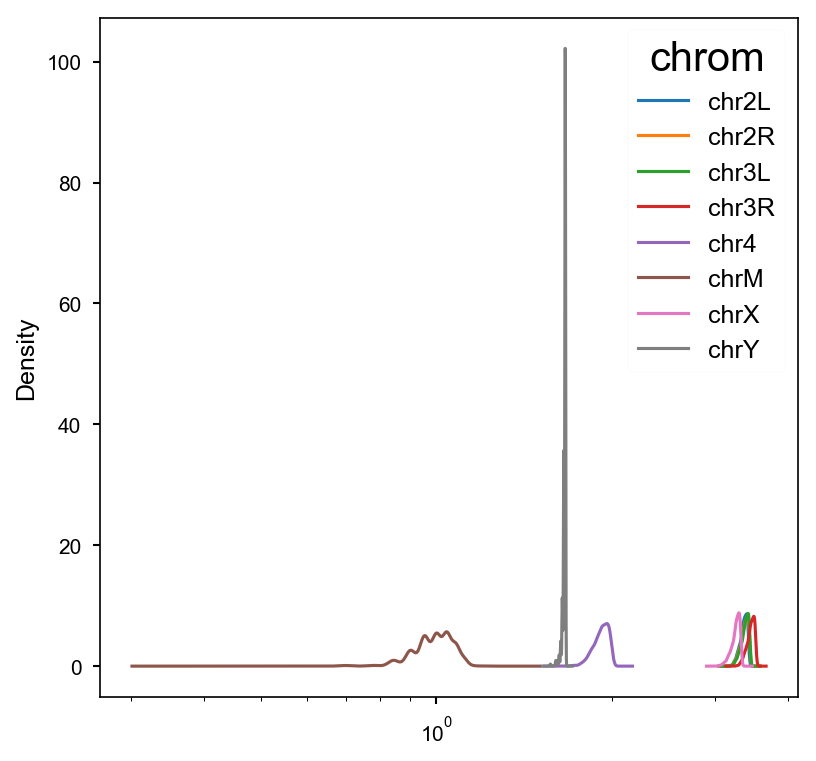

In [30]:
ax = np.log10(gonia_missing.join(nbconfig.fbgn2chrom).groupby('chrom').sum().T + 1).plot.kde()
ax.set_xscale('log')

In [40]:
bulk = pd.read_parquet('../bulk-rnaseq-wf/data/aggregation/gene_level_counts.parquet', columns=['C4_TDT', 'C2_TDT', 'C3_TDT', 'C1_TDT'])

In [41]:
bulk = bulk[~bulk.index.str.startswith('ERCC')]

In [53]:
from larval_gonad.normalization import tpm

In [56]:
gene_len = pd.read_csv('../output/gene_ts_lengths.tsv', sep='\t', index_col=0).gene_ts_length

In [59]:
gene_len = gene_len.reindex(bulk.index)

In [60]:
_tpm = tpm(bulk, gene_len)

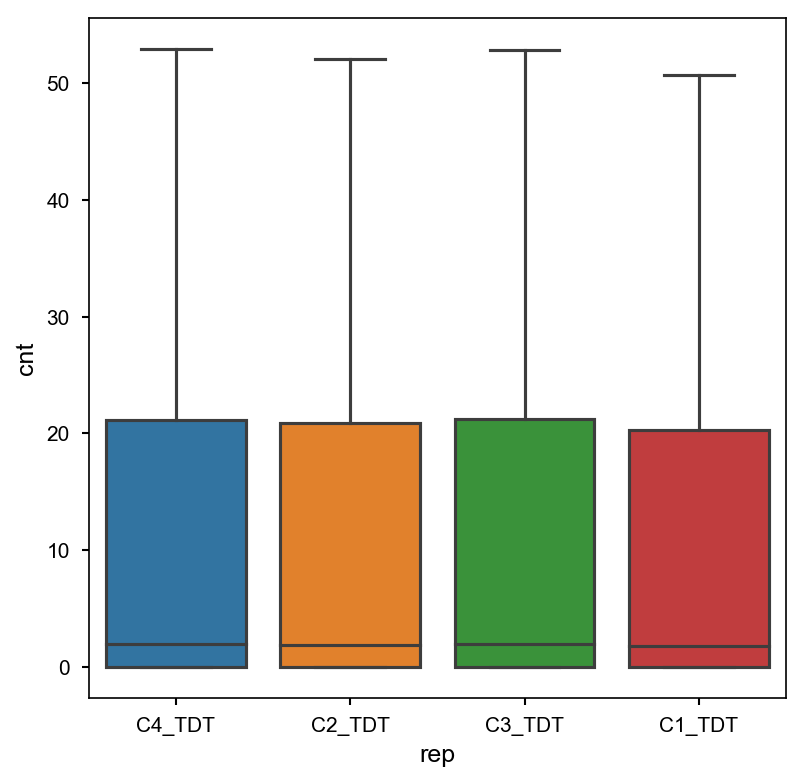

In [63]:
sns.boxplot('rep', 'cnt', data=_tpm.melt(var_name='rep', value_name='cnt'), showfliers=False)

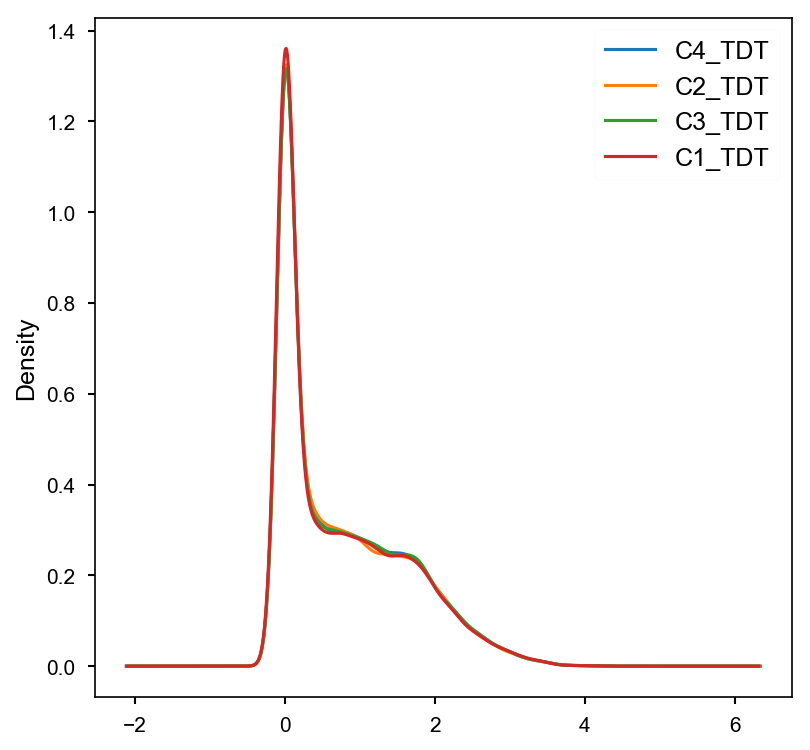

In [66]:
np.log10(_tpm + 1).plot.kde()

In [86]:
tpm_med = _tpm.median(axis=1)

In [91]:
off = tpm_med == 0

In [95]:
off_list = tpm_med[off].index.tolist()

In [97]:
tpm_med[~off].sort_values()

Geneid
FBgn0266098        0.006596
FBgn0264502        0.007955
FBgn0004880        0.008858
FBgn0262508        0.009938
FBgn0263994        0.010359
                   ...     
FBgn0029752     8794.526912
FBgn0051907     9299.038278
FBgn0264307    10107.393820
FBgn0027512    11089.430734
FBgn0046294    16373.400492
Length: 12132, dtype: float64

In [100]:
len(off_list)

5341

In [81]:
expressed = _tpm[~_tpm.index.isin(off)].median(axis=1)

In [82]:
expressed

Geneid
FBgn0000003       0.000000
FBgn0000008       0.308743
FBgn0000014       4.068143
FBgn0000015       0.853698
FBgn0000017      30.943059
                  ...     
FBgn0285950    1592.418986
FBgn0285951      16.509792
FBgn0285952     115.638103
FBgn0285954      10.529333
FBgn0285955      71.217503
Length: 13273, dtype: float64

In [99]:
pd.read_parquet('../scrnaseq-wf/data/seurat_norm_by_cluster.parquet')

,Spermatogonia,Early 1º Spermatocytes,Mid 1º Spermatocytes,Late 1º Spermatocytes,Early Cyst Cells,Mid Cyst Cells,Late Cyst Cells,Terminal Epithelium,Pigment Cells,Unknown (9),Unknown (10),Unknown (11)
FBgn,,,,,,,,,,,,
FBgn0031081,1.364676,6.281694,5.718024,3.922293,9.764831,12.198445,34.545968,1.958704,0.000000,14.464338,5.663631,0.384271
FBgn0031085,481.630977,1870.803187,2396.655383,2141.423896,452.966695,697.935982,544.907686,333.302469,285.161958,232.010488,222.704014,369.817387
FBgn0040784,1433.780552,1393.871140,979.242871,1078.392049,204.406475,383.705777,224.566168,169.333821,130.681355,117.852980,84.973216,153.861122
FBgn0031086,4.217180,2.883973,0.098070,0.000000,2.484050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056665
FBgn0031082,130.809532,558.443747,655.995203,526.948576,116.979552,181.598979,129.330223,88.323805,53.269968,48.154262,67.286299,144.788021
...,...,...,...,...,...,...,...,...,...,...,...,...
FBgn0035736,0.348945,0.000000,0.000000,2.271678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053341
FBgn0035685,0.000000,0.192230,0.166039,1.643573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061536
FBgn0042187,0.690210,0.527204,1.462503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
